In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
#libreria test normalidad
from statsmodels.stats.stattools import (omni_normtest,robust_skewness, jarque_bera,
                                         durbin_watson, _medcouple_1d, medcouple,
                                         robust_kurtosis, robust_skewness)
#libreria test normalidad
from scipy import stats as st



In [5]:
df=pd.read_csv("D:/Estudios/PythonRegresion/demanda.csv",encoding = "ISO-8859-1")

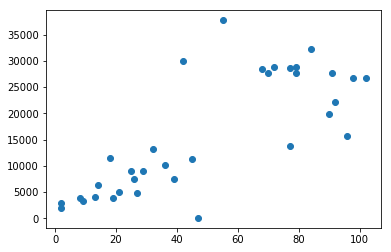

In [5]:
pl.plot(df['Celular'],df['Ingreso'], 'o')


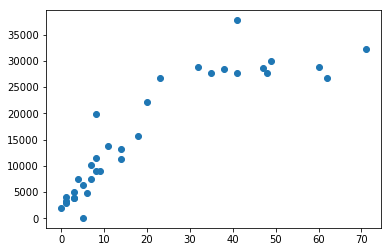

In [6]:
pl.plot(df['PC'],df['Ingreso'], 'o')

In [7]:
df.corr()

,Celular,PC,Ingreso
Celular,1.000000,0.678923,0.777773
PC,0.678923,1.000000,0.891308
Ingreso,0.777773,0.891308,1.000000


In [80]:
#modelo1 = sm.OLS(df['Ingreso'],sm.add_constant(df[['PC']])).fit()
modelo1 = ols('Ingreso~PC',data=df).fit()

In [7]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                Ingreso   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     123.7
Date:                Tue, 25 Apr 2017   Prob (F-statistic):           1.58e-12
Time:                        11:11:16   Log-Likelihood:                -337.93
No. Observations:                  34   AIC:                             679.9
Df Residuals:                      32   BIC:                             682.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5841.5496   1261.339      4.631      0.0

In [30]:
#Anova
table = sm.stats.anova_lm(modelo1, typ=2)
print(table)

                sum_sq    df           F        PR(>F)
PC        3.304187e+09   1.0  123.665333  1.584986e-12
Residual  8.550011e+08  32.0         NaN           NaN


In [67]:
e=modelo1.resid
#esperanza de error que sean a 0
np.mean(e)

1.0699937667916803e-13

(array([ 3.,  1.,  6.,  8.,  6.,  3.,  2.,  2.,  1.,  2.]),
 array([ -9052.26571554,  -6934.82210551,  -4817.37849548,  -2699.93488545,
          -582.49127542,   1534.9523346 ,   3652.39594463,   5769.83955466,
          7887.28316469,  10004.72677472,  12122.17038474]),
 <a list of 10 Patch objects>)

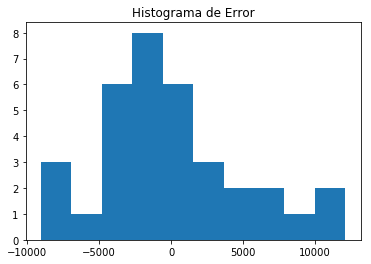

In [94]:
plt.title('Histograma de Error')
plt.hist(e)

{'boxes': [<matplotlib.lines.Line2D at 0xc1c50f0>],
 'caps': [<matplotlib.lines.Line2D at 0xc1ccac8>,
 'fliers': [<matplotlib.lines.Line2D at 0xc1d4cf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc1d44e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc1c5a58>,
  <matplotlib.lines.Line2D at 0xc1c5c50>]}

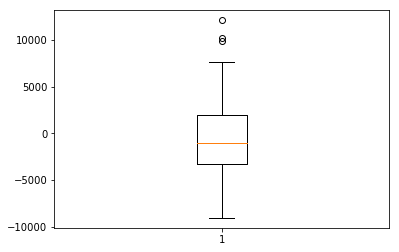

In [93]:
plt.boxplot(e)

((array([-2.0500397 , -1.65502516, -1.41824878, -1.24178231, -1.09728771,
         -0.97267593, -0.86159007, -0.76023875, -0.66615719, -0.57763676,
         -0.49343093, -0.4125902 , -0.33436303, -0.25813285, -0.18337584,
         -0.10963119, -0.03647875,  0.03647875,  0.10963119,  0.18337584,
          0.25813285,  0.33436303,  0.4125902 ,  0.49343093,  0.57763676,
          0.66615719,  0.76023875,  0.86159007,  0.97267593,  1.09728771,
          1.24178231,  1.41824878,  1.65502516,  2.0500397 ]),
  array([ -9052.26571554,  -8179.51058621,  -7885.5954728 ,  -6017.08132503,
          -3987.10278146,  -3801.54960995,  -3444.1418052 ,  -3349.3261957 ,
          -3349.3261957 ,  -3114.1418052 ,  -2309.3261957 ,  -2234.1418052 ,
          -1844.51058621,  -1709.69497671,  -1395.97498202,  -1387.84034347,
          -1234.87936721,   -722.28717196,   -321.91839095,     36.61721324,
            551.43282273,    632.15965653,    910.30502329,   1071.79087553,
           1707.71282804,   206

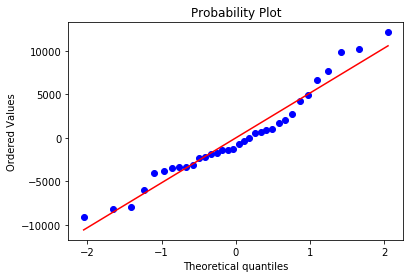

In [107]:
 st.probplot(e, plot=plt)

In [62]:
#normalidad de errores
st.jarque_bera(e)  # (jb_value , p-value)

(1.8950524883718989, 0.38769891061078476)

In [65]:
st.anderson(e,dist='norm') 

AndersonResult(statistic=0.61448701582607157, critical_values=array([ 0.526,  0.599,  0.718,  0.838,  0.996]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [66]:
st.shapiro(e) #(W , p-value)

(0.9537997245788574, 0.15951234102249146)

In [69]:
robust_kurtosis(e)

(0.056953365423658919,
 0.28778862103055913,
 0.029142071181384122,
 0.67820074410687692)

In [71]:
robust_skewness(e)

(0.5775899115302107,
 0.12161511519253164,
 0.25873786184682523,
 3.8914372710975676e-05)

In [72]:
jarque_bera(e)

(1.8950524883718989,
 0.38769891061078476,
 0.5775899115302107,
 3.056953365423659)

In [73]:
#independencia
durbin_watson(e)

1.5611031925765664